In [1]:
%pip install jira
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn

import pandas as pd
from jira import JIRA
import seaborn as sns
sns.set_theme()

You should consider upgrading via the '/Users/jbanas/.pyenv/versions/3.10.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/jbanas/.pyenv/versions/3.10.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/jbanas/.pyenv/versions/3.10.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/jbanas/.pyenv/versions/3.10.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the '/Users/jbanas/.pyenv/versions/3.10.0/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os

JIRA_URL = os.getenv("JIRA_URL")
JIRA_API_KEY = os.getenv("JIRA_API_KEY")
JIRA_EMAIL = os.getenv("JIRA_EMAIL")

jira = JIRA(JIRA_URL, basic_auth=(JIRA_EMAIL, JIRA_API_KEY))


In [5]:
STORY_POINTS_FIELD = 'customfield_10004'
FREQUENCY_SEVERITY_FIELD = 'customfield_18774'

issues = jira.search_issues(
    'created >= -100w AND created <= 0d',
    maxResults=False,
    fields=f'summary,issuetype,description,priority,reporter,{STORY_POINTS_FIELD},{FREQUENCY_SEVERITY_FIELD}'
)

In [ ]:
description = lambda issue: issue.fields.summary + '\n' + issue.fields.description if issue.fields.description else issue.fields.summary

df = pd.DataFrame([{
    'key': issue.key,
    'description': description(issue),
    # 'type': issue.fields.issuetype.name,
    # 'priority': issue.fields.priority.name,
    'story_points': issue.fields.customfield_10004,
    # 'frequency': issue.fields.customfield_18774,
    'reporter': issue.fields.reporter.displayName
} for issue in issues if hasattr(issue.fields, 'customfield_10004')])

df.set_index('key', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90094 entries, UXNR-1450 to ADEN-12582
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   description   90094 non-null  object 
 1   story_points  10303 non-null  float64
 2   reporter      90094 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.7+ MB


In [1]:
df.to_csv('jira_global.csv')

NameError: name 'df' is not defined

<Axes: >

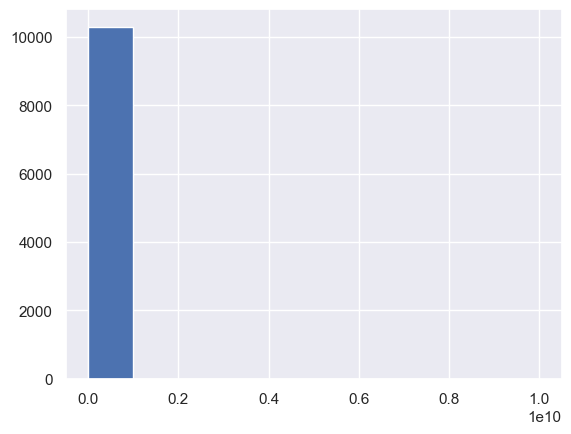

In [11]:
df['story_points'].hist()

In [ ]:
# df['reporter'].value_counts()[:10].plot(kind='bar')

/var/folders/hj/s2py2klj33j7glvwd3kyk5200000gp/T/ipykernel_27312/1139394250.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_refined['complexity'] = df_refined['story_points'].apply(lambda x: 'S' if x < 3 else 'M' if x == 3 else 'L')


<Axes: ylabel='count'>

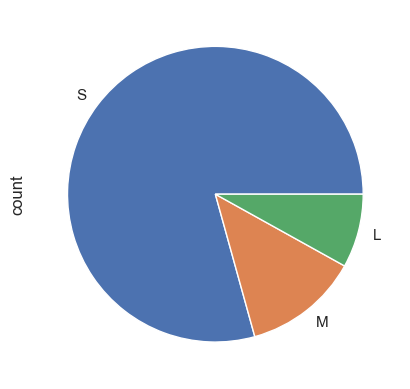

In [12]:
# filter out null story points
df_refined = df[df['story_points'] > 0]

df_refined['complexity'] = df_refined['story_points'].apply(lambda x: 'S' if x < 3 else 'M' if x == 3 else 'L')
df_refined['complexity'].value_counts().plot(kind='pie')

In [14]:
df_refined['complexity'].value_counts()

complexity
S    7609
M    1212
L     774
Name: count, dtype: int64

In [18]:
df_refined = (
    df_refined.groupby('complexity')
      .sample(n=774, random_state=42)  # Use random_state for reproducibility
)

df_refined['complexity'].value_counts()

complexity
L    774
M    774
S    774
Name: count, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import Pipeline

In [20]:
X_train, X_test, y_train, y_test =  train_test_split(df_refined['description'], df_refined['complexity'], test_size = 0.3, random_state =0, shuffle = True)

In [21]:
classifier = Pipeline([("tfidf", TfidfVectorizer()) , ("classifier", RandomForestClassifier(n_estimators=100))])
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_test, y_pred

(key
 UXNR-631         S
 ADEN-13811       L
 COTECH-757       M
 TRFC-1079        M
 ADEN-14413       L
                 ..
 PLATFORM-8949    S
 FTLDEV-4699      L
 MBL-1399         S
 TRFC-191         S
 FTLDEV-102       L
 Name: complexity, Length: 697, dtype: object,
 array(['S', 'L', 'M', 'M', 'L', 'M', 'M', 'L', 'S', 'S', 'M', 'S', 'L',
        'L', 'S', 'L', 'L', 'S', 'S', 'L', 'L', 'S', 'L', 'S', 'S', 'M',
        'M', 'S', 'M', 'M', 'L', 'L', 'S', 'M', 'S', 'M', 'M', 'S', 'S',
        'L', 'S', 'S', 'L', 'S', 'S', 'S', 'S', 'L', 'L', 'S', 'S', 'S',
        'M', 'S', 'M', 'S', 'L', 'M', 'S', 'S', 'S', 'L', 'M', 'M', 'S',
        'M', 'S', 'M', 'S', 'L', 'S', 'M', 'S', 'S', 'S', 'S', 'L', 'M',
        'L', 'S', 'S', 'M', 'L', 'M', 'L', 'L', 'L', 'L', 'M', 'M', 'M',
        'M', 'S', 'S', 'S', 'S', 'M', 'S', 'L', 'M', 'S', 'L', 'S', 'S',
        'L', 'L', 'M', 'L', 'M', 'S', 'S', 'S', 'L', 'M', 'M', 'S', 'S',
        'S', 'S', 'M', 'S', 'L', 'M', 'L', 'S', 'S', 'S', 'L', 'L', 'S'

In [22]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
accuracy_score(y_test, y_pred)

0.5423242467718795

In [2]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")

NameError: name 'sns' is not defined

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           L       0.64      0.53      0.58       245
           M       0.47      0.48      0.48       229
           S       0.53      0.62      0.57       223

    accuracy                           0.54       697
   macro avg       0.55      0.54      0.54       697
weighted avg       0.55      0.54      0.54       697



In [25]:
classifier.predict(["rewrite leaflet feature to the discussions service"])

array(['L'], dtype=object)

In [27]:
import joblib
joblib.dump(classifier, 'complexity_classifier_all.joblib')

['complexity_classifier_all.joblib']